## Step 1: 
#### Generate Subduction Convergence Kinematics Statistics 

The [convergence.py](convergence.py) depends on the PlateTectonicTools, which can be found at [https://github.com/EarthByte/PlateTectonicTools.git](https://github.com/EarthByte/PlateTectonicTools.git).
    

The configuration parameters for convergence.py can be found in [parameters.py](parameters.py).

Relevant parameters:
* plate_tectonic_tools_path -- the path to the PlateTectonicTools code
* rotation_files -- location of the rotation files
* topology_files -- location of the topology files
* threshold_sampling_distance_degrees -- the default threshold sampling distance along trenches (subduction zones)
* time.start -- start time
* time.end -- end time
* time.step -- time interval between steps
* velocity_delta_time -- time interval for velocity calculation
* anchor_plate_id - the anchor plate id
* convergence_data_filename_prefix -- the prefix of the output files
* convergence_data_filename_ext -- the extension name of the output files
* convergence_data_dir -- the name of the folder in which the output files go


In [1]:
%%capture --no-stdout

import subprocess
import convergence 

print('running convergence...')
print('this may take a while, be patient...')
print('')

#run the convergence script
convergence.run_it()

# now, let's list all the output files
o = subprocess.check_output(['ls', '-ltlh', './convergence_data'])
print(str(o).replace('\\n','\n')[2:-2])


running convergence...
this may take a while, be patient...

{ 'anchor_plate_id': 0,
  'convergence_data_dir': './convergence_data/',
  'convergence_data_filename_ext': 'csv',
  'convergence_data_filename_prefix': 'subStats',
  'grid_files': [ './AgeGrids/EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid-{time:d}.nc'],
  'input_file': 'coregistration_input_data_example.csv',
  'output_dir': 'coreg_output',
  'plate_tectonic_tools_path': '../../PlateTectonicTools/ptt/',
  'regions': [5, 10],
  'rotation_files': ['../data/Global_EarthByte_230-0Ma_GK07_AREPS.rot'],
  'threshold_sampling_distance_degrees': 0.2,
  'time': {'end': 230, 'start': 0, 'step': 1},
  'topology_files': [ '../data/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpml.gz',
                      '../data/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml.gz'],
  'vector_files': ['./convergence_data/subStats_{time:.2f}.csv'],
  'velocity_delta_time': 1}

Convergence completed successfully!
The result data

#### The columns in the csv files are:

* 0 lon
* 1 lat
* 2 subducting convergence (relative to trench) velocity magnitude (in cm/yr)
* 3 subducting convergence velocity obliquity angle (angle between trench normal vector and convergence velocity vector)
* 4 trench absolute (relative to anchor plate) velocity magnitude (in cm/yr)
* 5 trench absolute velocity obliquity angle (angle between trench normal vector and trench absolute velocity vector)
* 6 length of arc segment (in degrees) that current point is on
* 7 trench normal azimuth angle (clockwise starting at North, ie, 0 to 360 degrees) at current point
* 8 subducting plate ID
* 9 trench plate ID
* 10 distance (in degrees) along the trench line to the nearest trench edge
* 11 the distance (in degrees) along the trench line from the start edge of the trench
* 12 convergence velocity orthogonal (in cm/yr)
* 13 convergence velocity parallel  (in cm/yr) 
* 14 the trench plate absolute velocity orthogonal (in cm/yr)
* 15 the trench plate absolute velocity orthogonal (in cm/yr)
* 16 the subducting plate absolute velocity magnitude (in cm/yr)
* 17 the subducting plate absolute velocityobliquity angle (in degrees)
* 18 the subducting plate absolute velocity orthogonal       
* 19 the subducting plate absolute velocity parallel

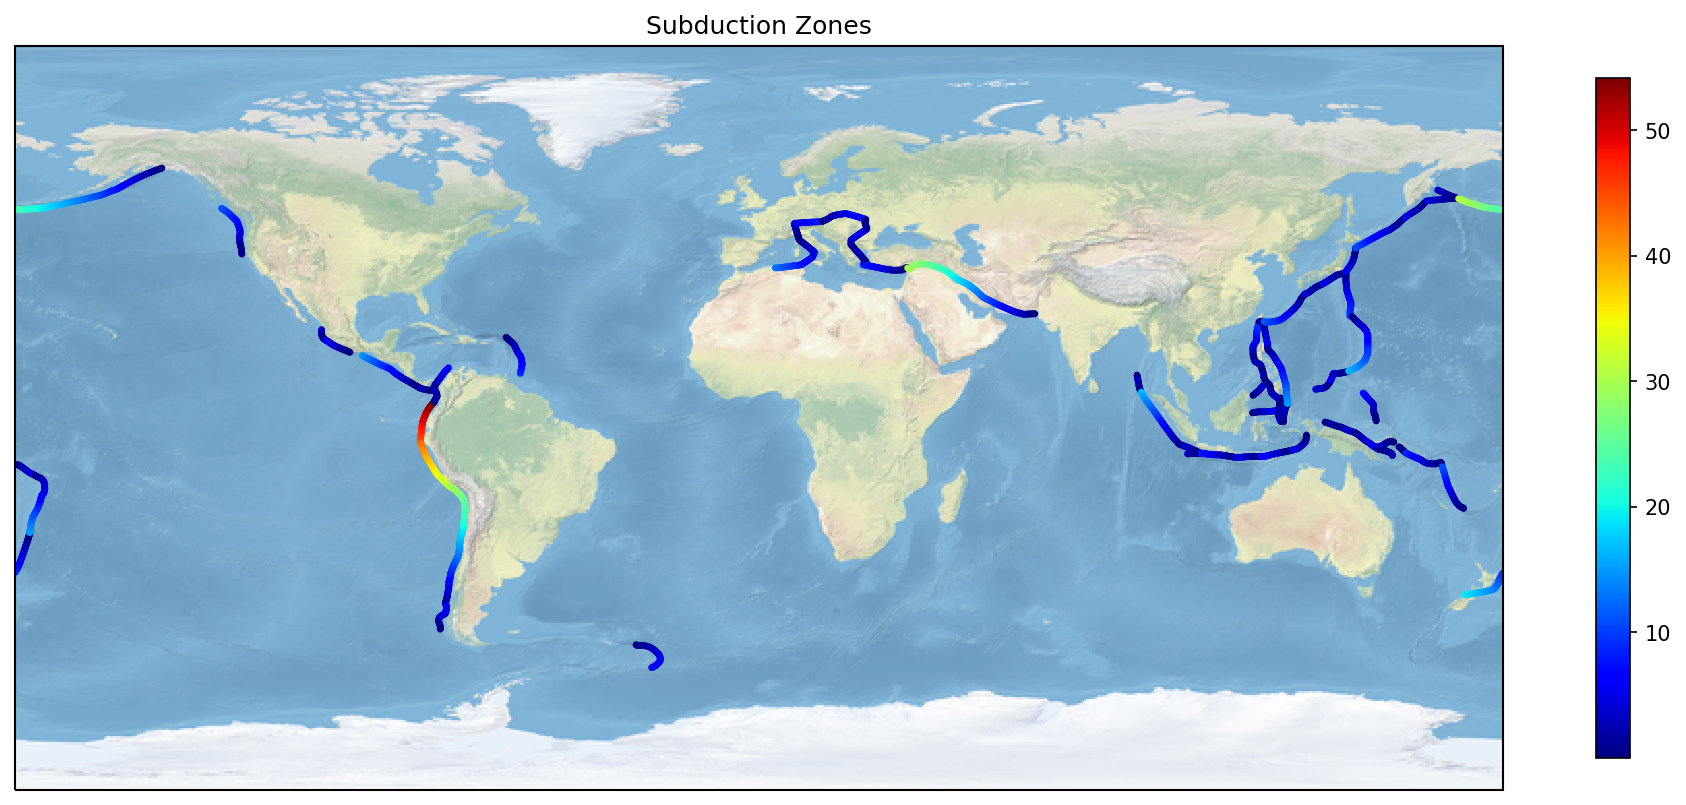

In [2]:
%matplotlib inline

#now we plot the Subduction Convergence Kinematics Statistics

import requests, os

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

trench_file = './convergence_data/subStats_0.00.csv'
trench_data= np.genfromtxt(trench_file)

#change this number to see the trench colored by different property. 
#The meaning of this number can be found in the cell above
color_by = 11
    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])

cb=ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', c=trench_data[:,color_by], cmap=plt.cm.jet)
plt.title('Subduction Zones')
fig.colorbar(cb, shrink=0.5)
plt.show()

##  Step 2:
#### Prepare Input Data For Coregistration

Create Coregistration Input File

The create_coregistration_input_data_example.run_it() function call will generate an input file example coregistration_input_data_example.csv. The input file has five columns. They are 
* index
* lon
* lat
* age
* plate id

There are many ways to get data for preparing the coregistration input file. As examples, we are going to show you how to extract data from EarthChem and Mineral Resources Data System (MRDS) later.

In [3]:
import create_coregistration_input_data_example

#run the example script to create a coregistration input file.
#the example input file will be used later in coregistration step.
create_coregistration_input_data_example.run_it()


The data have been written into coregistration_input_data_example.csv successfully!


#### Extract Data From EarthChem Data

After generating the subduction convergence kinematics statistics, the sample points of trenches can be used to extract data from EarthChem data.

    Example: python extract_earth_chem.py EarthChem_all.csv output CU 5
    
This command line will extract data from locations which are within 5 degrees of a trench sample point and with a variable name CU. A shafefile(output.shp) and a csv file(output.csv) will be created for the extracted data.

For more information about the usage of extract_earth_chem.py, run "python extract_earth_chem.py -h".

The EarthChem_all.csv can be found here https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv.

The following code cell will call extract_earth_chem.py and draw the deposits on a map.

loading data...


/home/michael/anaconda3/envs/portal/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2,5,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


query data...
44160
saving file...


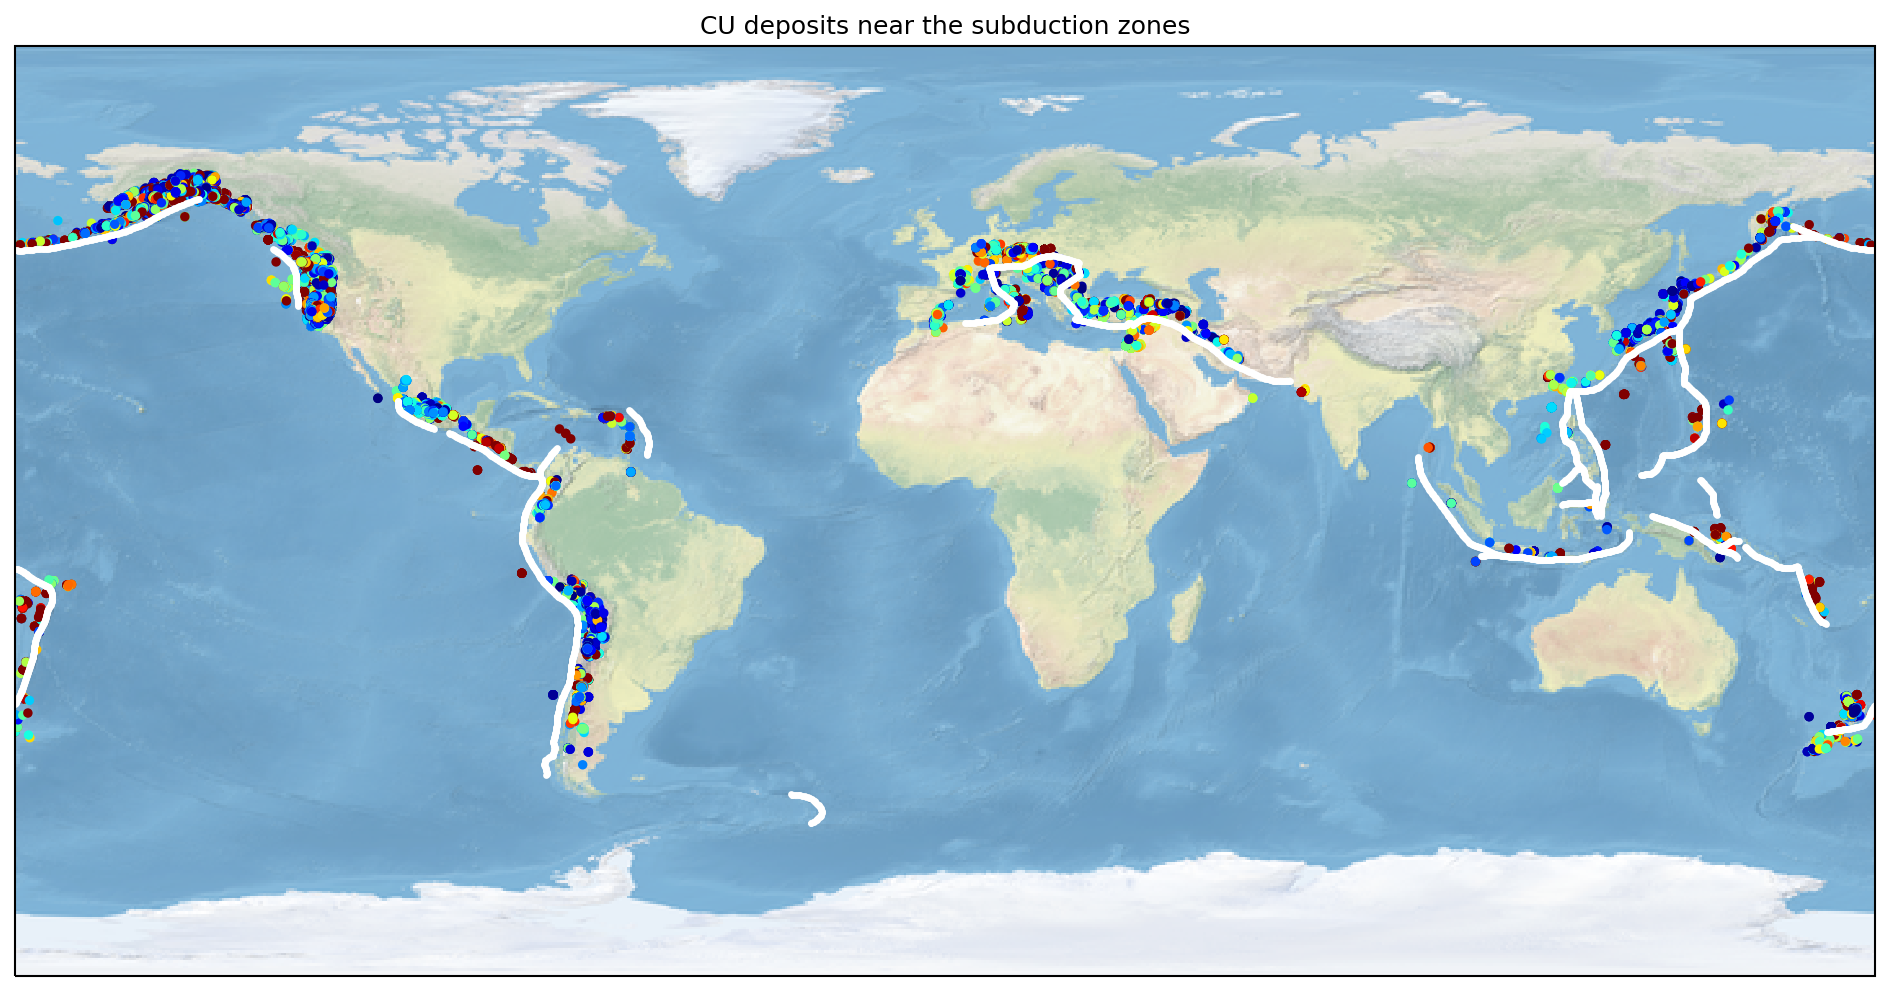

In [4]:
%matplotlib inline

import requests, os
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import extract_earth_chem

earth_chem_file = 'EarthChem_all.csv'
#if EarthChem_all.csv does not exist, download it.
if not os.path.isfile(earth_chem_file):
    print(f'downloading {earth_chem_file}')
    myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv')
    open(earth_chem_file, 'wb').write(myfile.content)

#available mineral symbols 
#SIO2,U234_U238,TIO2,AL2O3,FE2O3,TH230_TH232,FE2O3T,TH232_TH230,FEO,FEOT,MGO,RA228_RA226,CAO,NA2O,K2O,
#P2O5,MNO,U238_ACTIVITY,LOI,H2O_PLUS,TH230,H2O_MINUS,H2O,RA226,CR2O3,NIO,LA,CE,CACO3,PR,SM,EU,GD,TB,DY,
#HO,ER,TM,YB,U234_U238_ACTIVITY,LU,LI,BE,B,C,CO2,F,CL,K,CA,MG,SC,TI,V,FE,CR,MN,CO,NI,CU,ZN,GA,ZR,GER,SR,
#K40_AR36,BI,OS187_OS188,NB,TH232_U238,PB208_PB206,CD,PO210_TH230,U238_PB204,BA,AR40_AR36,W,AR37_AR39,AU,
#XE129_XE132,LU176_HF177,HG,OS186_OS188,PB206_PB208,TA,PB210_U238,SB,SR87_SR86,SE,PB207_PB204,PB206_PB204,
#PB208_PB204,SN,S,TH230_U238,ND143_ND144,U,RA226_TH230,I,P,Y,EPSILON_ND,MO,OS184_OS188,PD,RA226_TH228,TE,
#TH232_PB204,HF,OS187_OS186,CL36_CL,RA228_TH232,PB206_PB207,PB,INDIUM,H,PB210_RA226,AR38_AR36,AR40_AR39,D18O,
#AG,TH,U235_PB204,NE21_NE22,TL,NE20_NE22,AS,HF176_HF177,RB,AL,BE10_BE9,AR36_AR39,ND,CS,quartz
extract_earth_chem.main(
    earth_chem_file, #input file
    'EarthChem_CU', #output file
    'CU', #mineral symbol
    5 #region of interest (in degrees)
)

data=np.genfromtxt('EarthChem_CU.csv', delimiter=',', skip_header=1)
trench_file = './convergence_data/subStats_0.00.csv'
if os.path.isfile(trench_file):
    trench_data= np.genfromtxt(trench_file)
else:
    raise Exception(f'\nERROR: unable to open file {trench_file}. \nRun Step 1 Generate Subduction Convergence Kinematics Statistics first!')
    
    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,1], data[:,0], 50, marker='.',c=data[:,3], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('CU deposits near the subduction zones')
#fig.colorbar(cb, shrink=0.5)
plt.show()

#### Extract Data From Mineral Resources Data System (MRDS)
The file mrds.csv can be found at [https://mrdata.usgs.gov/mrds/mrds-csv.zip](https://mrdata.usgs.gov/mrds/mrds-csv.zip)

loading data...


/home/michael/anaconda3/envs/portal/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


query data...
9627
saving file...


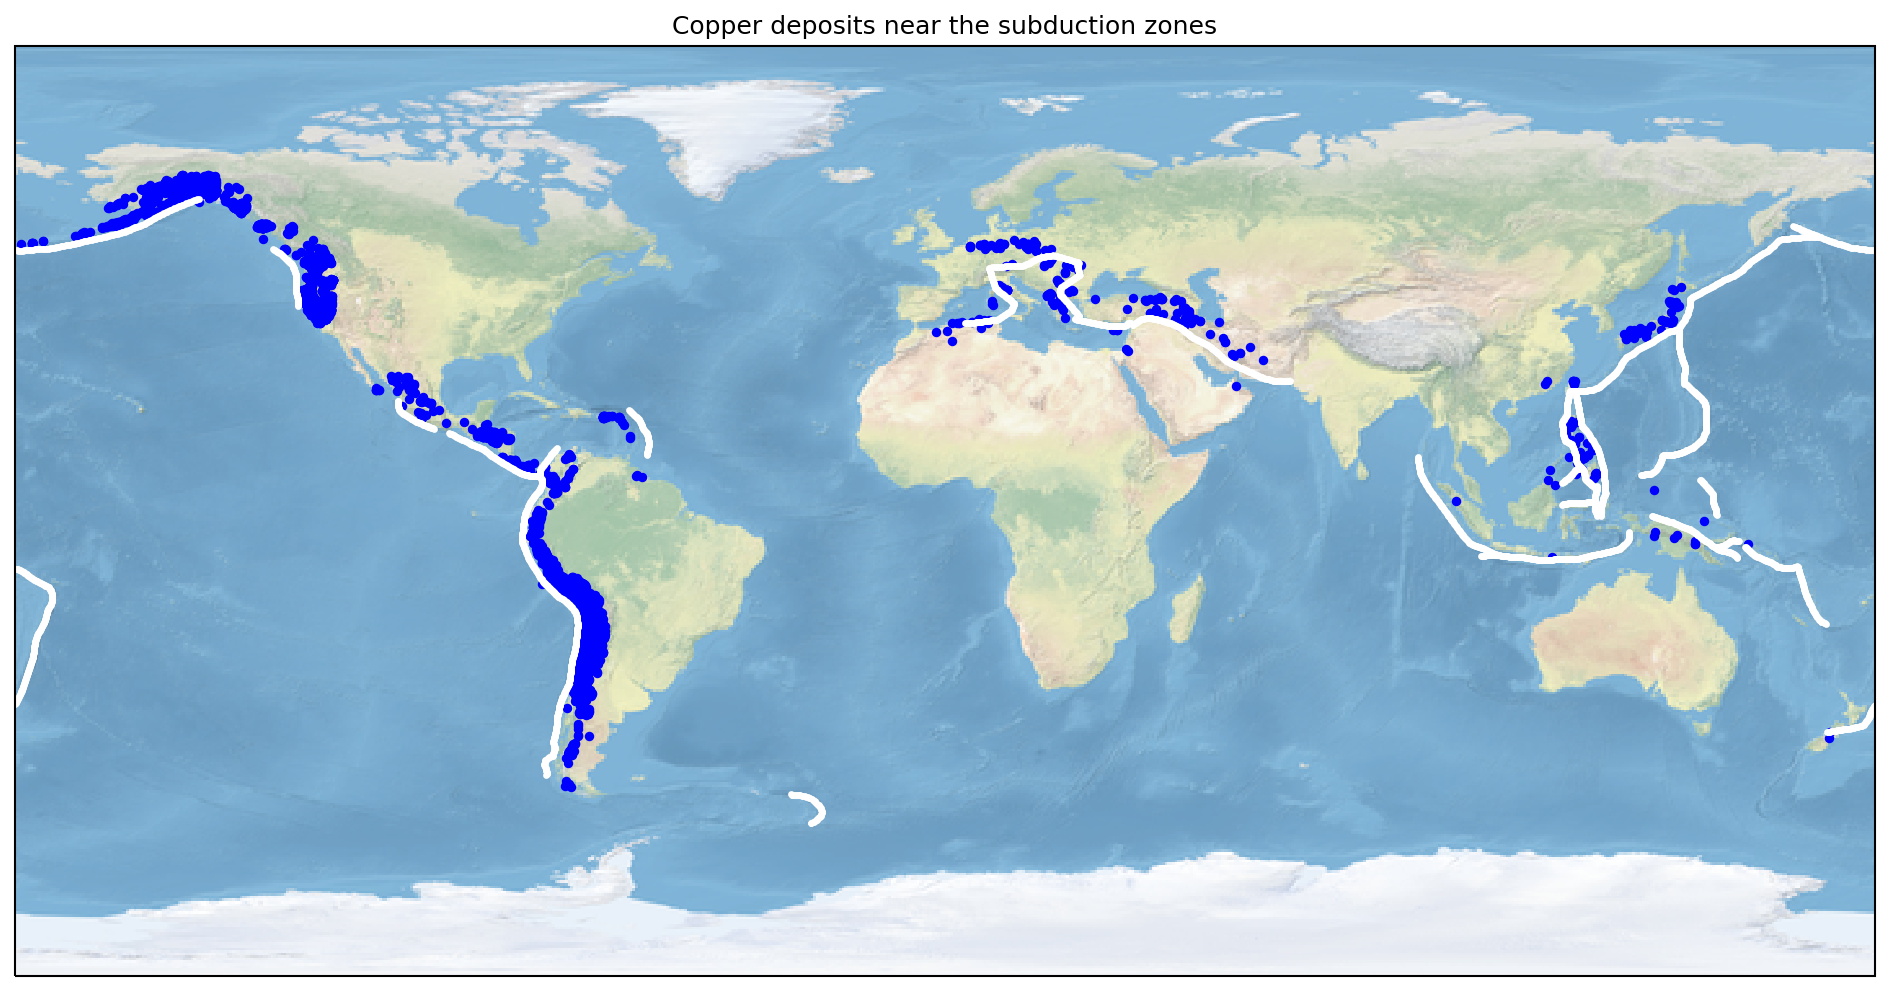

In [5]:
%matplotlib inline

import requests, os

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import extract_data_from_mrds

mrds_file = 'mrds.csv'
#if mrds.csv does not exist, download it.
if not os.path.isfile(mrds_file):
    print(f'downloading {mrds_file}')
    myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/MRDS/mrds.csv')
    open(mrds_file, 'wb').write(myfile.content)

#available mineral names 
#'Graphite', 'Sulfur-Pyrite', 'Gold', 'Fluorine-Fluorite', 'Vermiculite', 'Refiner', 
#'Sulfur', 'Mercury', 'Refinery', 'Gallium', 'Limestone', 'Arsenic', 'Osmium', 'Cadmium', 
#'Copper Sulfide', 'Lead', 'Iron-Pyrite', 'Palladium', 'Silica', 'PGE', 'Smelter', 'Construction', 
#'Boron-Borates', 'Bismuth', 'Asbestos', 'Ruthenium', 'Copper', 'Radium', 'Uranium', 'Wollastonite', 
#'Indium', 'Iron', 'Corundum', 'Pyrite', 'Titanium', 'Feldspar', 'Rhodium', 'Mica', 'Strontium', 
#'Barium-Barite', 'Gilsonite', 'Nickel', 'Free', 'Iridium', 'Coal', 'Garnet', 'Selenium', 'Copper Oxide', 
#'General', 'Thorium', 'Rhenium', 'Sand and Gravel', 'Niobium (Columbium)', 'Tellurium', 'Tungsten', 
#'Talc-Soapstone', 'Quartz', 'Stone', 'Nickel Laterite', 'Magnesite', 'Water', 'Gemstone', 'Perlite', 
#'Germanium', 'Calcium', 'Zinc', 'Platinum', 'Molybdenum', 'Zirconium', 'Crushed/Broken', 'Pig Iron', 
#'Chromium', 'Clay', 'Silver', 'Salt', 'Kaolin', 'Dimension', 'Tin', 'Aluminum', 'REE', 'Gypsum-Anhydrite', 
#'Semiprecious Gemstone', 'Metal', 'Emery', 'Beryllium', 'Tantalum', 'Rubidium', 'Antimony', 
#'Phosphorus-Phosphates', 'Lithium', 'Manganese', 'Sulfuric Acid', 'Cobalt', 'Vanadium'
extract_data_from_mrds.main(
    mrds_file, #input file
    'mrds_copper', #output file
    'Copper', #mineral name
    5 #region of interest (in degrees)
)

data=np.genfromtxt('mrds_copper.csv', delimiter='\t', skip_header=1)
trench_file = './convergence_data/subStats_0.00.csv'
if os.path.isfile(trench_file):
    trench_data= np.genfromtxt(trench_file)
else:
    raise Exception(f'\nERROR: unable to open file {trench_file}. \nRun Step 1 Generate Subduction Convergence Kinematics Statistics first!')
    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,0], data[:,1], 50, marker='.',c='blue', vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('Copper deposits near the subduction zones')
#fig.colorbar(cb, shrink=0.5)
plt.show()


## Step 3:
#### Coregistration

This step associates input points with the trench sample points. For a given input point's coordinates, this script tries to find the nearest trench point within a certain region. If found, the subduction convergence kinematics statistics of the trench point will be associated with the input point. The coregistered data will be processed and used as input for machine learning models later.

Relevant parameters in [parameters.py](parameters.py):

* input_file
* output_dir
* regions
* vector_files
* grid_files

Data columns:

* 0 reconstructed input point lon
* 1 reconstructed input point lat
* 2 distance to the nearest trench point
* 3 trench point lon
* 4 trench point lat
* 5 subducting convergence (relative to trench) velocity magnitude (in cm/yr)
* 6 subducting convergence velocity obliquity angle (angle between trench normal vector and convergence velocity vector)
* 7 trench absolute (relative to anchor plate) velocity magnitude (in cm/yr)
* 8 trench absolute velocity obliquity angle (angle between trench normal vector and trench absolute velocity vector)
* 9 length of arc segment (in degrees) that current point is on
* 10 trench normal azimuth angle (clockwise starting at North, ie, 0 to 360 degrees) at current point
* 11 subducting plate ID
* 12 trench plate ID
* 13 distance (in degrees) along the trench line to the nearest trench edge
* 14 the distance (in degrees) along the trench line from the start edge of the trench
* 15 convergence velocity orthogonal (in cm/yr)
* 16 convergence velocity parallel  (in cm/yr)
* 17 the trench plate absolute velocity orthogonal (in cm/yr)
* 18 the trench plate absolute velocity orthogonal (in cm/yr)
* 19 the subducting plate absolute velocity magnitude (in cm/yr)
* 20 the subducting plate absolute velocityobliquity angle (in degrees)
* 21 the subducting plate absolute velocity orthogonal
* 22 the subducting plate absolute velocity parallel


In [6]:
import coregistration
import requests, os

if not os.path.isdir('.AgeGrids'):
    os.system('mkdir AgeGrids')
    
url_temp='https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.15/netCDF-4_0-230Ma/EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid-{}.nc'
file_temp='./AgeGrids/EarthByte_AREPS_v1.15_Muller_etal_2016_AgeGrid-{}.nc'
print('Downloading age grids...')
for time in range(231):
    if not os.path.isfile(file_temp.format(time)):
        myfile = requests.get(url_temp.format(time))
        open(file_temp.format(time), 'wb').write(myfile.content)
        #print('saving '+file_temp.format(time))

#run the coregistration script
coregistration.main()


region of interest: 5
the length of input data is: 92540
region of interest: 10
the length of input data is: 7300
region of interest: 5
the length of input data is: 92540
region of interest: 10
the length of input data is: 0
The coregistration output data have been saved in folder coreg_output successfully!
Time taken: 74.87650394439697  seconds


## Step 4:
#### Data Wrangling
Click [here](data_wrangling.ipynb) to open the Data Wrangling notebook.

## Step 5:

#### Evaluate Machine Learning Models

click [here](machine_learning_new.ipynb) to open Machine Learning notebook.
